<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Vector Representations
## *Data Science Unit 4 Sprint 2 Assignment 2*

In [206]:
import re
import string

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import spacy

## 1) *Clean:* Job Listings from indeed.com that contain the title "Data Scientist" 

You have `job_listings.csv` in the data folder for this module. The text data in the description column is still messy - full of html tags. Use the [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) library to clean up this column. You will need to read thru the documentation to accomplish this task. 

`Tip:` You will need to install the `bs4` library inside your conda environment. 

In [207]:
from bs4 import BeautifulSoup
import urllib3
import requests
import pandas as pd

http = urllib3.PoolManager()


url = "https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP/master/module2-vector-representations/data/job_listings.csv"
jobs = pd.read_csv(url)
jobs.head()

,Unnamed: 0,description,title
0,0,"b""<div><div>Job Requirements:</div><ul><li><p>...",Data scientist
1,1,b'<div>Job Description<br/>\n<br/>\n<p>As a Da...,Data Scientist I
2,2,b'<div><p>As a Data Scientist you will be work...,Data Scientist - Entry Level
3,3,"b'<div class=""jobsearch-JobMetadataHeader icl-...",Data Scientist
4,4,b'<ul><li>Location: USA \xe2\x80\x93 multiple ...,Data Scientist


In [208]:
#Taking one entry and trying to parse just the words from the entry
test_entry = jobs.description[0]
test_entry[:100]

'b"<div><div>Job Requirements:</div><ul><li><p>\\nConceptual understanding in Machine Learning models '

In [209]:
soup = BeautifulSoup(test_entry)
print(soup.get_text())

b"Job Requirements:\nConceptual understanding in Machine Learning models like Nai\xc2\xa8ve Bayes, K-Means, SVM, Apriori, Linear/ Logistic Regression, Neural, Random Forests, Decision Trees, K-NN along with hands-on experience in at least 2 of them\nIntermediate to expert level coding skills in Python/R. (Ability to write functions, clean and efficient data manipulation are mandatory for this role)\nExposure to packages like NumPy, SciPy, Pandas, Matplotlib etc in Python or GGPlot2, dplyr, tidyR in R\nAbility to communicate Model findings to both Technical and Non-Technical stake holders\nHands on experience in SQL/Hive or similar programming language\nMust show past work via GitHub, Kaggle or any other published article\nMaster's degree in Statistics/Mathematics/Computer Science or any other quant specific field.\nApply Now"


In [210]:
parsed_entries = []
for entry in jobs.description:
    soup = BeautifulSoup(entry)
    parsed_entries.append(soup.get_text())
    
test = pd.DataFrame(parsed_entries, columns=['parsed'])
test.head()

,parsed
0,"b""Job Requirements:\nConceptual understanding ..."
1,"b'Job Description\n\nAs a Data Scientist 1, yo..."
2,b'As a Data Scientist you will be working on c...
3,"b'$4,969 - $6,756 a monthContractUnder the gen..."
4,b'Location: USA \xe2\x80\x93 multiple location...


In [211]:
test['parsed'][0]

'b"Job Requirements:\\nConceptual understanding in Machine Learning models like Nai\\xc2\\xa8ve Bayes, K-Means, SVM, Apriori, Linear/ Logistic Regression, Neural, Random Forests, Decision Trees, K-NN along with hands-on experience in at least 2 of them\\nIntermediate to expert level coding skills in Python/R. (Ability to write functions, clean and efficient data manipulation are mandatory for this role)\\nExposure to packages like NumPy, SciPy, Pandas, Matplotlib etc in Python or GGPlot2, dplyr, tidyR in R\\nAbility to communicate Model findings to both Technical and Non-Technical stake holders\\nHands on experience in SQL/Hive or similar programming language\\nMust show past work via GitHub, Kaggle or any other published article\\nMaster\'s degree in Statistics/Mathematics/Computer Science or any other quant specific field.\\nApply Now"'

## 2) Use Spacy to tokenize the listings 

In [7]:
import spacy
from spacy.tokenizer import Tokenizer

nlp = spacy.load('en_core_web_lg')

# Tokenizer
tokenizer = Tokenizer(nlp.vocab)

In [8]:
a = tokenizer('test text')
dir(a)
a.text

'test text'

In [10]:
tokens = []
for doc in tokenizer.pipe(test['parsed'],batch_size=500):
    # Generate a list of tokens for every entry in the df
    doc_tokens = [token.text for token in doc]
    # append that list to the tokens list
    tokens.append(doc_tokens)

In [19]:
tokens[0][:5]

['b"Job', 'Requirements:\\nConceptual', 'understanding', 'in', 'Machine']

In [43]:
tokens_series=pd.Series(tokens,name='tokens')

In [44]:
jobs.head()

,Unnamed: 0,description,title
0,0,"b""<div><div>Job Requirements:</div><ul><li><p>...",Data scientist
1,1,b'<div>Job Description<br/>\n<br/>\n<p>As a Da...,Data Scientist I
2,2,b'<div><p>As a Data Scientist you will be work...,Data Scientist - Entry Level
3,3,"b'<div class=""jobsearch-JobMetadataHeader icl-...",Data Scientist
4,4,b'<ul><li>Location: USA \xe2\x80\x93 multiple ...,Data Scientist


In [42]:
tokens_series.head()

0    [b"Job, Requirements:\nConceptual, understandi...
1    [b'Job, Description\n\nAs, a, Data, Scientist,...
2    [b'As, a, Data, Scientist, you, will, be, work...
3    [b'$4,969, -, $6,756, a, monthContractUnder, t...
4    [b'Location:, USA, \xe2\x80\x93, multiple, loc...
Name: tokens, dtype: object

In [38]:
tokens_series.name

'tokens'

In [49]:
token_jobs = pd.merge(jobs,tokens_series,left_index=True,right_index=True)

In [55]:
token_jobs.drop(['description'],1,inplace=True)

In [113]:
token_jobs.head()

,Unnamed: 0,title,tokens
0,0,Data scientist,"[b""Job, Requirements:\nConceptual, understandi..."
1,1,Data Scientist I,"[b'Job, Description\n\nAs, a, Data, Scientist,..."
2,2,Data Scientist - Entry Level,"[b'As, a, Data, Scientist, you, will, be, work..."
3,3,Data Scientist,"[b'$4,969, -, $6,756, a, monthContractUnder, t..."
4,4,Data Scientist,"[b'Location:, USA, \xe2\x80\x93, multiple, loc..."


In [117]:
token_jobs['token_str'] = token_jobs['tokens'].apply(str)

## 3) Use Scikit-Learn's CountVectorizer to get word counts for each listing.

In [118]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer(stop_words='english')

# Getting one list with every single token
# This will have duplicates. Will that influence result?
all_tokens=[]
for i in tokens:
    for token in i:
        all_tokens.append(token)

vect.fit(all_tokens)
vect.fit(token_jobs['token_str'])

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [107]:
token_jobs['tokens'][0]

['b"Job',
 'Requirements:\\nConceptual',
 'understanding',
 'in',
 'Machine',
 'Learning',
 'models',
 'like',
 'Nai\\xc2\\xa8ve',
 'Bayes,',
 'K-Means,',
 'SVM,',
 'Apriori,',
 'Linear/',
 'Logistic',
 'Regression,',
 'Neural,',
 'Random',
 'Forests,',
 'Decision',
 'Trees,',
 'K-NN',
 'along',
 'with',
 'hands-on',
 'experience',
 'in',
 'at',
 'least',
 '2',
 'of',
 'them\\nIntermediate',
 'to',
 'expert',
 'level',
 'coding',
 'skills',
 'in',
 'Python/R.',
 '(Ability',
 'to',
 'write',
 'functions,',
 'clean',
 'and',
 'efficient',
 'data',
 'manipulation',
 'are',
 'mandatory',
 'for',
 'this',
 'role)\\nExposure',
 'to',
 'packages',
 'like',
 'NumPy,',
 'SciPy,',
 'Pandas,',
 'Matplotlib',
 'etc',
 'in',
 'Python',
 'or',
 'GGPlot2,',
 'dplyr,',
 'tidyR',
 'in',
 'R\\nAbility',
 'to',
 'communicate',
 'Model',
 'findings',
 'to',
 'both',
 'Technical',
 'and',
 'Non-Technical',
 'stake',
 'holders\\nHands',
 'on',
 'experience',
 'in',
 'SQL/Hive',
 'or',
 'similar',
 'programm

In [130]:
dtm = vect.transform(token_jobs['token_str'])
dtm

<426x9816 sparse matrix of type '<class 'numpy.int64'>'
	with 97604 stored elements in Compressed Sparse Row format>

In [131]:
dtm.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 2, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 1, 0, ..., 0, 0, 0]], dtype=int64)

In [101]:
len(token_jobs)

426

In [120]:
len(vect.get_feature_names())

9816

You have to pass the transform function a df with strings, not lists, doing so allows you to avoid the string unpacking that I did in the following code cell (commented for posterity)

In [121]:

# test = vect.transform(all_tokens)
# pd.DataFrame(test.todense(),columns=vect.get_feature_names)
"""
count_df = pd.DataFrame(columns = ['token','count_vector'])

for token in token_jobs['tokens']:
    vect.transform(token)
    new_row = {'token':token, 'count_vector':vect.transform(token)}
    count_df=count_df.append(new_row,ignore_index=True)

# This is a format that contains the token information in df
# format but this isn't required for the 
count_df.head()
"""

"\ncount_df = pd.DataFrame(columns = ['token','count_vector'])\n\nfor token in token_jobs['tokens']:\n    vect.transform(token)\n    new_row = {'token':token, 'count_vector':vect.transform(token)}\n    count_df=count_df.append(new_row,ignore_index=True)\n\n# This is a format that contains the token information in df\n# format but this isn't required for the \ncount_df.head()\n"

In [ ]:
count_df['count_vector']

In [136]:
dtm_f = pd.DataFrame(dtm.todense(),columns=vect.get_feature_names())
print(dtm_f.shape)
dtm_f.head()

(426, 9816)


,00,000,02115,03,0356,04,062,06366,08,10,...,zenreach,zero,zeus,zf,zheng,zillow,zones,zoom,zuckerberg,zurich
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 4) Visualize the most common word counts

In [149]:
word_counts = dtm_f.sum().sort_values(ascending=False)
word_counts.head()

data          4394
xe2           1417
x80           1404
experience    1238
business      1198
dtype: int64

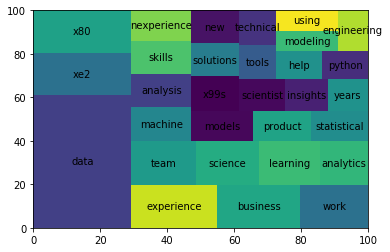

In [167]:
import squarify
import matplotlib.pyplot as plt

wc_pct = word_counts/word_counts.sum()

size = 30
squarify.plot(sizes=wc_pct[:size], label=wc_pct.keys()[:size])

## 5) Use Scikit-Learn's tfidfVectorizer to get a TF-IDF feature matrix

In [179]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create object 
tfidf = TfidfVectorizer(stop_words='english')

# Train vocab:
dtm = tfidf.fit_transform(token_jobs['token_str'])

dtm = pd.DataFrame(dtm.todense(),columns=tfidf.get_feature_names())

print("shape of matrix= ", dtm.shape)
dtm.head()


shape of matrix=  (426, 9816)


,00,000,02115,03,0356,04,062,06366,08,10,...,zenreach,zero,zeus,zf,zheng,zillow,zones,zoom,zuckerberg,zurich
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.104421,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


## 6) Create a NearestNeighbor Model. Write the description of your ideal datascience job and query your job listings. 

In [181]:
from sklearn.neighbors import NearestNeighbors

# Fit on DTM
nn = NearestNeighbors(n_neighbors=5, algorithm = 'kd_tree')
nn.fit(dtm)

NearestNeighbors(algorithm='kd_tree', leaf_size=30, metric='minkowski',
         metric_params=None, n_jobs=None, n_neighbors=5, p=2, radius=1.0)

In [183]:
nn.kneighbors([dtm.iloc[3].values])

(array([[0.        , 1.32566358, 1.33002919, 1.33479159, 1.33479159]]),
 array([[  3,  49, 383,  69, 402]], dtype=int64))

In [214]:
test['parsed'][3]

"b'$4,969 - $6,756 a monthContractUnder the general supervision of Professors Dana Mukamel and Kai Zheng, the incumbent will join the CalMHSA Mental Health Tech Suite Innovation (INN) Evaluation Team. This large, statewide multi-year study will evaluate the effectiveness of two new and innovative applications offered to people with mental health conditions, which include opportunities for online chatting between users and online listeners Responsibilities of the incumbent will include managing and analyzing text data created by users of the two mental health applications as part of the research and evaluation objectives of the team. The incumbent will collaborate with faculty and other team researchers, and will be expected to create under supervision and direction variables describing the usage of the apps, the interactions between users, and the effectiveness of the apps. The incumbent will also be expected to interact with the vendors of the apps around data issues.\\n\\nThe Univers

In [215]:
test['parsed'][49]

'b"Position Purpose: The primary purpose of this position is to serve as the data scientist with a split portfolio between the Atlantic City office and the Austin chemistry group.\\n\\nEssential Duties and Responsibilities:\\nPerforms data analytics, specifically data clean-up, data processing, predictive modeling, chemometric statistical modeling and analysis, multivariate data analysis, machine learning, and/or data mining, as related to scientific data.\\nApplies technical skills to plan and execute assigned project work including development of computational models, programming of detection algorithms, and machine learning.\\nMaintains operational capabilities of computation assets as needed by project requirements.\\nLeads meetings with company clients by preparing and presenting meeting materials in meetings.\\nAppropriately annotates project developed computer code through comments and user manuals.\\nPresents technical results through the drafting of technical reports.\\nPresen

## Stretch Goals

 - Try different visualizations for words and frequencies - what story do you want to tell with the data?
 - Scrape Job Listings for the job title "Data Analyst". How do these differ from Data Scientist Job Listings
 - Try and identify requirements for experience specific technologies that are asked for in the job listings. How are those distributed among the job listings?
 - Use a clustering algorithm to cluster documents by their most important terms. Do the clusters reveal any common themes?
  - **Hint:** K-means might not be the best algorithm for this. Do a little bit of research to see what might be good for this. Also, remember that algorithms that depend on Euclidean distance break down with high dimensional data.
 - Create a labeled dataset - which jobs will you apply for? Train a model to select the jobs you are most likely to apply for. :) 